In [1]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

# Load Data and Subset

<Item title:"SAC_CTS_CRLF_Terrestrial_Habitat_Monitoring" type:Feature Layer Collection owner:Anooshi>
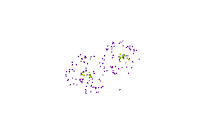

In [2]:
# Load data from arcGIS online
output = arcGIS_data_load('db5b18928c0e4a3a8c782d3c10ef4ca2')

UP = output['data1']
feature_service = output['feature_service']

In [4]:
# Rename date and subset data for desired year.
UP.rename(columns={"Date": "Observation_Date"}, inplace=True)
sYear = input("Start Year? (YYYY)")
sub = year_subset(UP,sYear)

Start Year? (YYYY)2018
Analysis for 2018-10-01 07:00 UTC to 2019-10-01 07:00 UTC
Entries in Subset: 10


# QAQC

In [5]:
UP.columns

Index(['Availabilityofpreybase', 'BHR_Site', 'Comments', 'Observation_Date',
       'GlobalID', 'MoistureRank', 'OBJECTID', 'PresenceOfRefugia',
       'PresenceOfRipCor', 'Presenceofpredators', 'SHAPE', 'Species_Sci',
       'SufficientCovNearPools', 'Surveyor1', 'Surveyor2'],
      dtype='object')

In [6]:
# Search for whitespaces and extra spaces 
QAQC_whitespace(UP, exclude_cols=['Comments'])

Name of Object ID Column:  ['OBJECTID']


Analysis for: Surveyor2
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: BHR_Site
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Availabilityofpreybase
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: SufficientCovNearPools
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: MoistureRank
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: PresenceOfRipCor
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Presenceofpredators
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Species_Sc

In [8]:
#find blank entries
find_blank_entries(UP, exclude_cols=['Surveyor2'])

No blank OBJECTID
No blank BHR_Site
No blank Availabilityofpreybase
No blank SufficientCovNearPools
No blank MoistureRank
No blank PresenceOfRipCor
No blank Presenceofpredators
No blank Species_Sci
No blank Surveyor1
No blank SHAPE
No blank PresenceOfRefugia
No blank Comments
No blank GlobalID
No blank Observation_Date


In [9]:
#compare data from previous years
compare_years_catagorical(UP, ['Availabilityofpreybase', 'BHR_Site',
       'MoistureRank',  'PresenceOfRefugia', 'PresenceOfRipCor',
       'Presenceofpredators',  'Species_Sci', 'SufficientCovNearPools',
       'Surveyor1', 'Surveyor2'] ,'2017','2018')

# Export data deliverable

In [10]:
field_order = [
    'BHR_Site',
    'Observation_Date',
    'Surveyor1', 
    'Surveyor2',
    'Species_Sci',
    'PresenceOfRefugia', 
    'PresenceOfRipCor',
    'MoistureRank', 
    'SufficientCovNearPools',
    'Availabilityofpreybase',
    'Presenceofpredators',
    'Comments',
    'OBJECTID',
    'GlobalID',
    'SHAPE',]

In [11]:
export_data_deliverable(UP, feature_service, field_order, 1)

No Related Table Found
Exported to G:/Scripts_Toolboxes/Annual_Report/Outputs/SAC_Terrestrial_Habitat_Upland_Monitoring_Data_20191205.xlsx
